### Importing the libraries required

In [1]:
import requests
import pandas as pd
import yfinance as yf
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import math
from datetime import date

### Defining a few strings to be used throughout the code

In [2]:
Open = 'Open'
High = 'High'
Low = 'Low'
Close = 'Close'
Volume = 'Volume'

### Defining the stock ticker and the period for backtesting

In [3]:
name = 'IBM'
date1 = '2019-01-01'
date2 = date.today().strftime('%Y-%m-%d')

### Downloading data to satisfy the given requirements from the Yahoo! Finance API

In [4]:
df = yf.download(name, date1, date2)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,108.346077,109.321220,107.476097,108.671127,90.443275,5212009
2019-01-02,107.084129,110.879539,106.778206,110.143402,91.668602,4434935
2019-01-03,109.493309,109.827919,107.734222,107.944550,89.838554,4546648
2019-01-04,109.856598,112.323135,109.407265,112.160614,93.347458,4683779
2019-01-07,112.332695,113.604210,111.539200,112.954109,94.007858,3923755
...,...,...,...,...,...,...
2022-08-25,133.649994,134.429993,133.070007,133.979996,133.979996,2706000
2022-08-26,134.100006,134.179993,130.339996,130.380005,130.380005,4184100
2022-08-29,129.990005,131.419998,129.570007,130.309998,130.309998,2783000


### Defining a num variable to be used later in the code

In [5]:
num = df.shape[0]

### Calculating Typical Price and adding it as a column in the dataframe

In [6]:
tp = [None] * num
for i in range(num):
    tp[i] = (df.iloc[i].at[Low] + df.iloc[i].at[High] + df.iloc[i].at[Close]) / 3
df['Typical Price'] = tp
df

,Open,High,Low,Close,Adj Close,Volume,Typical Price
Date,,,,,,,
2018-12-31,108.346077,109.321220,107.476097,108.671127,90.443275,5212009,108.489482
2019-01-02,107.084129,110.879539,106.778206,110.143402,91.668602,4434935,109.267049
2019-01-03,109.493309,109.827919,107.734222,107.944550,89.838554,4546648,108.502230
2019-01-04,109.856598,112.323135,109.407265,112.160614,93.347458,4683779,111.297005
2019-01-07,112.332695,113.604210,111.539200,112.954109,94.007858,3923755,112.699173
...,...,...,...,...,...,...,...
2022-08-25,133.649994,134.429993,133.070007,133.979996,133.979996,2706000,133.826665
2022-08-26,134.100006,134.179993,130.339996,130.380005,130.380005,4184100,131.633331
2022-08-29,129.990005,131.419998,129.570007,130.309998,130.309998,2783000,130.433334


### Calculating Raw Money Flow and adding it as a column in the dataframe

In [7]:
rmf = [None] * num
for i in range(num):
    rmf[i] = (df.iloc[i].at[Volume] * df.iloc[i].at['Typical Price'])
df['Raw Money Flow'] = rmf
df

,Open,High,Low,Close,Adj Close,Volume,Typical Price,Raw Money Flow
Date,,,,,,,,
2018-12-31,108.346077,109.321220,107.476097,108.671127,90.443275,5212009,108.489482,5.654482e+08
2019-01-02,107.084129,110.879539,106.778206,110.143402,91.668602,4434935,109.267049,4.845923e+08
2019-01-03,109.493309,109.827919,107.734222,107.944550,89.838554,4546648,108.502230,4.933214e+08
2019-01-04,109.856598,112.323135,109.407265,112.160614,93.347458,4683779,111.297005,5.212906e+08
2019-01-07,112.332695,113.604210,111.539200,112.954109,94.007858,3923755,112.699173,4.422039e+08
...,...,...,...,...,...,...,...,...
2022-08-25,133.649994,134.429993,133.070007,133.979996,133.979996,2706000,133.826665,3.621350e+08
2022-08-26,134.100006,134.179993,130.339996,130.380005,130.380005,4184100,131.633331,5.507670e+08
2022-08-29,129.990005,131.419998,129.570007,130.309998,130.309998,2783000,130.433334,3.629960e+08


### Calculating Money Ratio and adding it as a column in the dataframe

Instead of a normal average of positive/negative cash flows over the last 14 days, I have taken a weighted average of each with a higher preference given to the last week, and the highest weight given to the most recent date

In [8]:
mr = [None] * num
mr[0] = 1
weight = 1 - (1 / 7)
pos = df.iloc[0].at['Raw Money Flow']
neg = df.iloc[0].at['Raw Money Flow']
for i in range(1, num):
    if df.iloc[i].at['Typical Price'] > df.iloc[i - 1].at['Typical Price']:
        pos = weight * pos + (1 - weight) * df.iloc[i].at['Raw Money Flow']
        neg = weight * neg + (1 - weight) * 0
        mr[i] = pos/neg
    else:
        pos = weight * pos + (1 - weight) * 0
        neg = weight * neg + (1 - weight) * df.iloc[i].at['Raw Money Flow']
        mr[i] = pos/neg
df['Money Ratio'] = mr
df

,Open,High,Low,Close,Adj Close,Volume,Typical Price,Raw Money Flow,Money Ratio
Date,,,,,,,,,
2018-12-31,108.346077,109.321220,107.476097,108.671127,90.443275,5212009,108.489482,5.654482e+08,1.000000
2019-01-02,107.084129,110.879539,106.778206,110.143402,91.668602,4434935,109.267049,4.845923e+08,1.142834
2019-01-03,109.493309,109.827919,107.734222,107.944550,89.838554,4546648,108.502230,4.933214e+08,0.977081
2019-01-04,109.856598,112.323135,109.407265,112.160614,93.347458,4683779,111.297005,5.212906e+08,1.155884
2019-01-07,112.332695,113.604210,111.539200,112.954109,94.007858,3923755,112.699173,4.422039e+08,1.332841
...,...,...,...,...,...,...,...,...,...
2022-08-25,133.649994,134.429993,133.070007,133.979996,133.979996,2706000,133.826665,3.621350e+08,1.077405
2022-08-26,134.100006,134.179993,130.339996,130.380005,130.380005,4184100,131.633331,5.507670e+08,0.763351
2022-08-29,129.990005,131.419998,129.570007,130.309998,130.309998,2783000,130.433334,3.629960e+08,0.623585


### Calculating Money Flow Index and adding it as a column in the dataframe

In [9]:
mfi = [None] * num
for i in range(num):
    mfi[i] = 100 - (100 / (1 + df.iloc[i].at['Money Ratio']))
df['Money Flow Index'] = mfi
df

,Open,High,Low,Close,Adj Close,Volume,Typical Price,Raw Money Flow,Money Ratio,Money Flow Index
Date,,,,,,,,,,
2018-12-31,108.346077,109.321220,107.476097,108.671127,90.443275,5212009,108.489482,5.654482e+08,1.000000,50.000000
2019-01-02,107.084129,110.879539,106.778206,110.143402,91.668602,4434935,109.267049,4.845923e+08,1.142834,53.332835
2019-01-03,109.493309,109.827919,107.734222,107.944550,89.838554,4546648,108.502230,4.933214e+08,0.977081,49.420373
2019-01-04,109.856598,112.323135,109.407265,112.160614,93.347458,4683779,111.297005,5.212906e+08,1.155884,53.615322
2019-01-07,112.332695,113.604210,111.539200,112.954109,94.007858,3923755,112.699173,4.422039e+08,1.332841,57.133806
...,...,...,...,...,...,...,...,...,...,...
2022-08-25,133.649994,134.429993,133.070007,133.979996,133.979996,2706000,133.826665,3.621350e+08,1.077405,51.863032
2022-08-26,134.100006,134.179993,130.339996,130.380005,130.380005,4184100,131.633331,5.507670e+08,0.763351,43.289807
2022-08-29,129.990005,131.419998,129.570007,130.309998,130.309998,2783000,130.433334,3.629960e+08,0.623585,38.407920


### Generating plots for Close Price and Money Flow Index

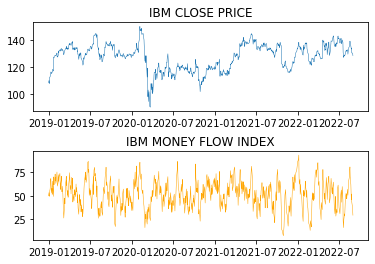

In [10]:
ax1 = plt.subplot2grid((12,3), (0,0), rowspan = 5, colspan = 3)
ax2 = plt.subplot2grid((12,3), (7,0), rowspan = 5, colspan = 3)
ax1.plot(df[Close], linewidth = 0.5)
ax1.set_title(name + ' CLOSE PRICE')
ax2.plot(df['Money Flow Index'], color = 'orange', linewidth = 0.5)
ax2.set_title(name + ' MONEY FLOW INDEX')
plt.show()

### Specifying points of sale/purchase based on conditions on Money Flow Index

In [11]:
buy_price = []
sell_price = []
mfi_signal = []
signal = 0
for i in range(num):
    if df.iloc[i - 1].at['Money Flow Index'] > 20 and df.iloc[i].at['Money Flow Index'] < 20:
        if signal != 1:
            buy_price.append(df.iloc[i].at['Typical Price'])
            sell_price.append(np.nan)
            signal = 1
            mfi_signal.append(signal)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            mfi_signal.append(0)
    elif df.iloc[i - 1].at['Money Flow Index'] < 80 and df.iloc[i].at['Money Flow Index'] > 80:
        if signal != -1:
            buy_price.append(np.nan)
            sell_price.append(df.iloc[i].at['Typical Price'])
            signal = -1
            mfi_signal.append(signal)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            mfi_signal.append(0)
    else:
        buy_price.append(np.nan)
        sell_price.append(np.nan)
        mfi_signal.append(0)
        
df['Buy Price'] = buy_price
df['Sell Price'] = sell_price
df['MFI Signal'] = mfi_signal
df

,Open,High,Low,Close,Adj Close,Volume,Typical Price,Raw Money Flow,Money Ratio,Money Flow Index,Buy Price,Sell Price,MFI Signal
Date,,,,,,,,,,,,,
2018-12-31,108.346077,109.321220,107.476097,108.671127,90.443275,5212009,108.489482,5.654482e+08,1.000000,50.000000,NaN,NaN,0
2019-01-02,107.084129,110.879539,106.778206,110.143402,91.668602,4434935,109.267049,4.845923e+08,1.142834,53.332835,NaN,NaN,0
2019-01-03,109.493309,109.827919,107.734222,107.944550,89.838554,4546648,108.502230,4.933214e+08,0.977081,49.420373,NaN,NaN,0
2019-01-04,109.856598,112.323135,109.407265,112.160614,93.347458,4683779,111.297005,5.212906e+08,1.155884,53.615322,NaN,NaN,0
2019-01-07,112.332695,113.604210,111.539200,112.954109,94.007858,3923755,112.699173,4.422039e+08,1.332841,57.133806,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,133.649994,134.429993,133.070007,133.979996,133.979996,2706000,133.826665,3.621350e+08,1.077405,51.863032,NaN,NaN,0
2022-08-26,134.100006,134.179993,130.339996,130.380005,130.380005,4184100,131.633331,5.507670e+08,0.763351,43.289807,NaN,NaN,0
2022-08-29,129.990005,131.419998,129.570007,130.309998,130.309998,2783000,130.433334,3.629960e+08,0.623585,38.407920,NaN,NaN,0


### Generating my position

In [12]:
position = []
for i in range(num):
    if df.iloc[i].at['MFI Signal'] > 1:
        position.append(0)
    else:
        position.append(1)
for i in range(num):
    if df.iloc[i].at['MFI Signal'] == 1:
        position[i] = 1
    elif df.iloc[i].at['MFI Signal'] == -1:
        position[i] = 0
    else:
        position[i] = position[i - 1]
df['Position'] = position
df

,Open,High,Low,Close,Adj Close,Volume,Typical Price,Raw Money Flow,Money Ratio,Money Flow Index,Buy Price,Sell Price,MFI Signal,Position
Date,,,,,,,,,,,,,,
2018-12-31,108.346077,109.321220,107.476097,108.671127,90.443275,5212009,108.489482,5.654482e+08,1.000000,50.000000,NaN,NaN,0,1
2019-01-02,107.084129,110.879539,106.778206,110.143402,91.668602,4434935,109.267049,4.845923e+08,1.142834,53.332835,NaN,NaN,0,1
2019-01-03,109.493309,109.827919,107.734222,107.944550,89.838554,4546648,108.502230,4.933214e+08,0.977081,49.420373,NaN,NaN,0,1
2019-01-04,109.856598,112.323135,109.407265,112.160614,93.347458,4683779,111.297005,5.212906e+08,1.155884,53.615322,NaN,NaN,0,1
2019-01-07,112.332695,113.604210,111.539200,112.954109,94.007858,3923755,112.699173,4.422039e+08,1.332841,57.133806,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,133.649994,134.429993,133.070007,133.979996,133.979996,2706000,133.826665,3.621350e+08,1.077405,51.863032,NaN,NaN,0,0
2022-08-26,134.100006,134.179993,130.339996,130.380005,130.380005,4184100,131.633331,5.507670e+08,0.763351,43.289807,NaN,NaN,0,0
2022-08-29,129.990005,131.419998,129.570007,130.309998,130.309998,2783000,130.433334,3.629960e+08,0.623585,38.407920,NaN,NaN,0,0


### Calculating returns

In [13]:
ibm_ret = pd.DataFrame(np.diff(df['Close'])).rename(columns = {0:'Returns'})
mfi_strategy_ret = []
for i in range(len(ibm_ret)):
    returns = ibm_ret['Returns'][i] * df['Position'][i]
    mfi_strategy_ret.append(returns)
mfi_strategy_ret_df = pd.DataFrame(mfi_strategy_ret).rename(columns = {0:'MFI Returns'})
investment_value = 100000
number_of_stocks = math.floor(investment_value / df['Close'][-1])
mfi_investment_ret = []
for i in range(len(mfi_strategy_ret_df['MFI Returns'])):
    returns = number_of_stocks * mfi_strategy_ret_df['MFI Returns'][i]
    mfi_investment_ret.append(returns)
mfi_investment_ret_df = pd.DataFrame(mfi_investment_ret).rename(columns = {0:'Investment Returns'})
total_investment_ret = round(sum(mfi_investment_ret_df['Investment Returns']), 2)
profit_percentage = math.floor((total_investment_ret / investment_value) * 100)
print('Profit gained from the MFI strategy by investing ' + str(investment_value) + ' in ' + name + ' : ' + str(total_investment_ret))
print('Profit percentage of the MFI strategy : ' + str(profit_percentage))

Profit gained from the MFI strategy by investing 100000 in IBM : 46589.25
Profit percentage of the MFI strategy : 46
